# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Data Preprocessing

In [7]:
import pandas as pd
data = pd.read_csv('Movies.csv')

In [8]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [20]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

# Handling missing values

In [11]:
data.fillna(0)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
11778,Rann,(2010),137 min,"Drama, Mystery, Thriller",6.9,2476,Ram Gopal Varma,Amitabh Bachchan,Riteish Deshmukh,Gul Panag
11779,Ranna,(2015),152 min,"Action, Comedy, Drama",6.2,616,Nandakishore,Sudeep,Prakash Raj,Avinash
11784,Ranviir the Marshal,(2015),132 min,"Action, Drama, Thriller",7.7,7,Milind Ukey,Rishy,Rati Agnihotri,Ramnita Chaudhry
11785,Rao Saheb,(1986),123 min,"Comedy, Drama",5.7,7,Vijaya Mehta,Arvind Gadgil,Chandrakant Gokhale,Vasant Ingle


# Pair Plot

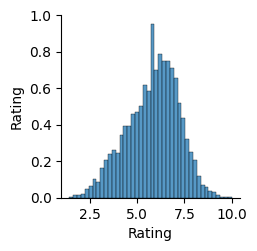

In [46]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('Movies.csv')
columns = ['Name','Year','Duration','Genre','Rating','Votes','Director','Actor 1','Actor 2','Actor 3']
sns.pairplot(data[columns])

# Model Building

In [58]:
X = data[['Rating']]
y = data['Votes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [1459.96973377]
Intercept: -5827.511086295743


# Model Evaluation

In [57]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 199858608.62154165


# Data Visualization

In [68]:
plt.figure(figsize=(60,180))
sns.countplot(y=data['Genre'], order = data['Genre'].value_counts().index)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

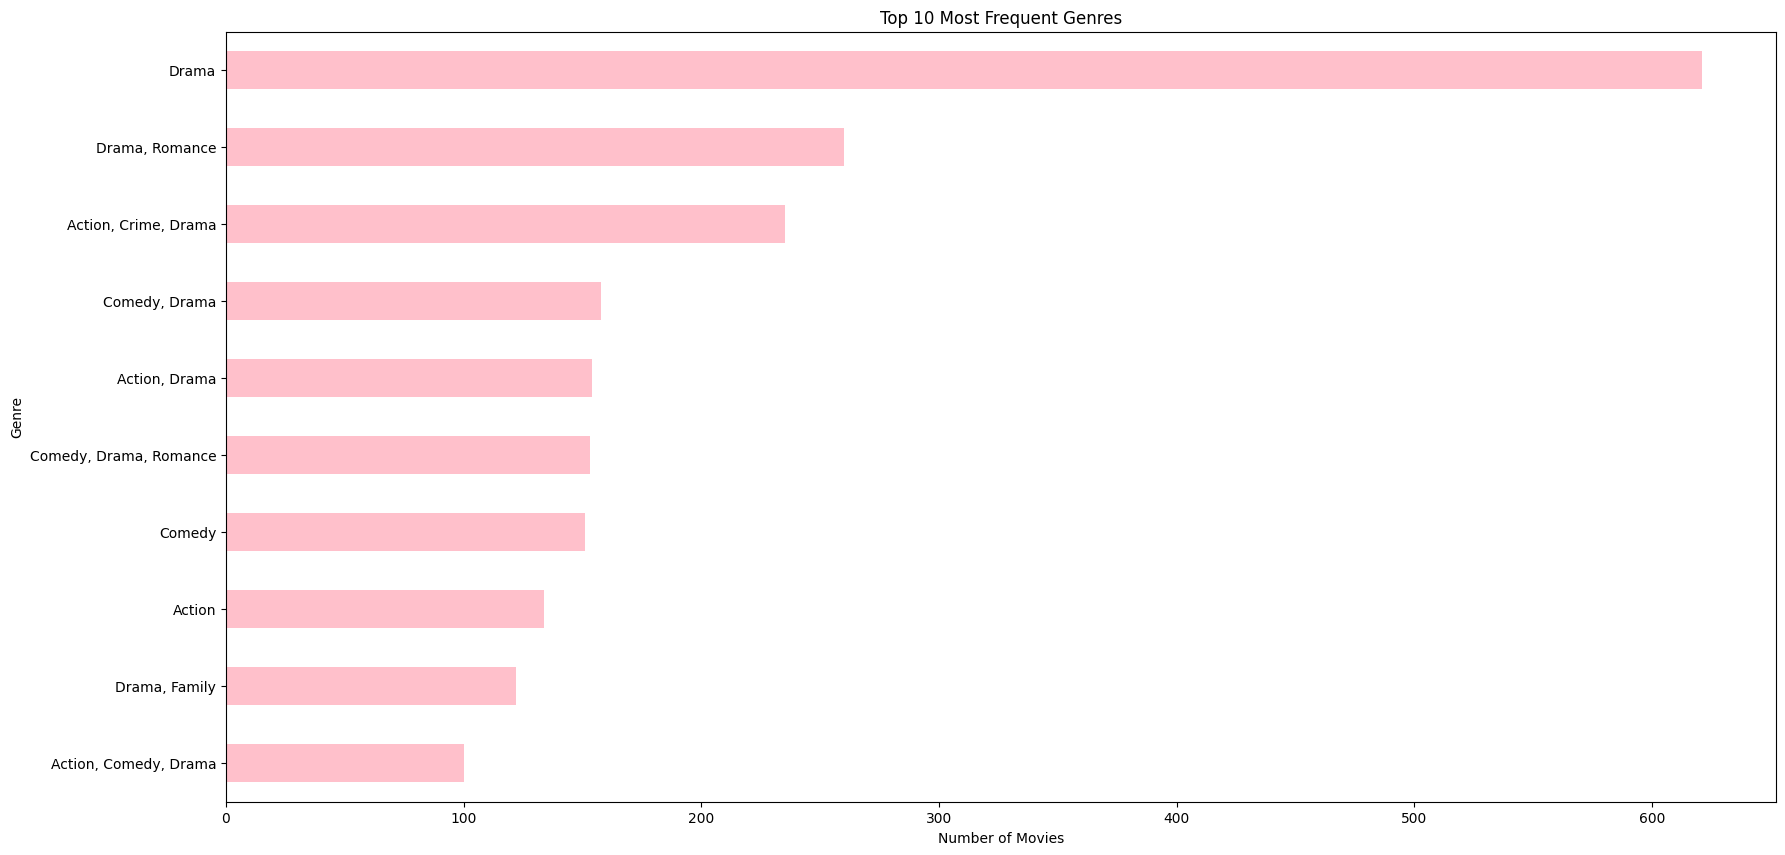

In [32]:
top_genres = data['Genre'].value_counts().head(10)
plt.figure(figsize=(20, 10))
top_genres.plot(kind='barh', color='pink')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  
plt.show()

# Train test split

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [73]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [74]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 199858608.62154165


In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)

# Exploratory Data Analysis

# Histogram of the 'Rating' column

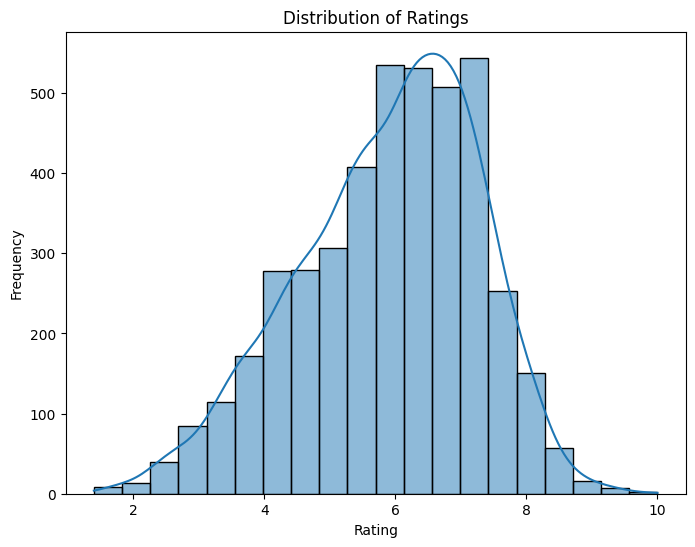

In [77]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of 'Rating' vs 'Votes'

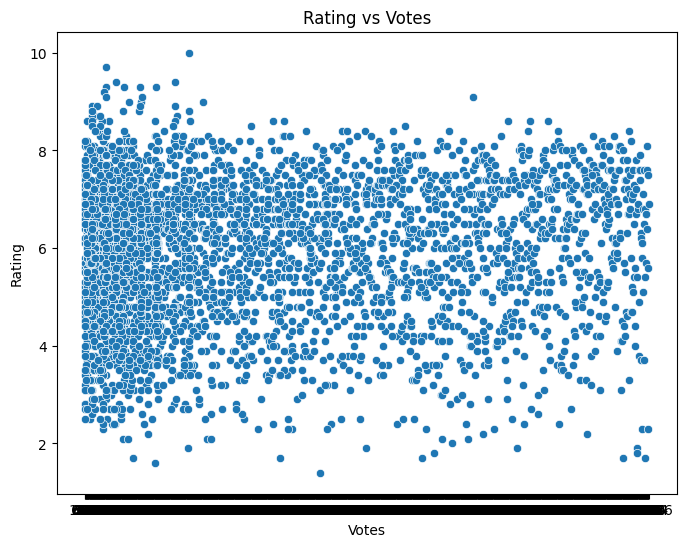

In [78]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Votes', y='Rating')
plt.title('Rating vs Votes')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

# Box plot of 'Rating' vs 'Genre'

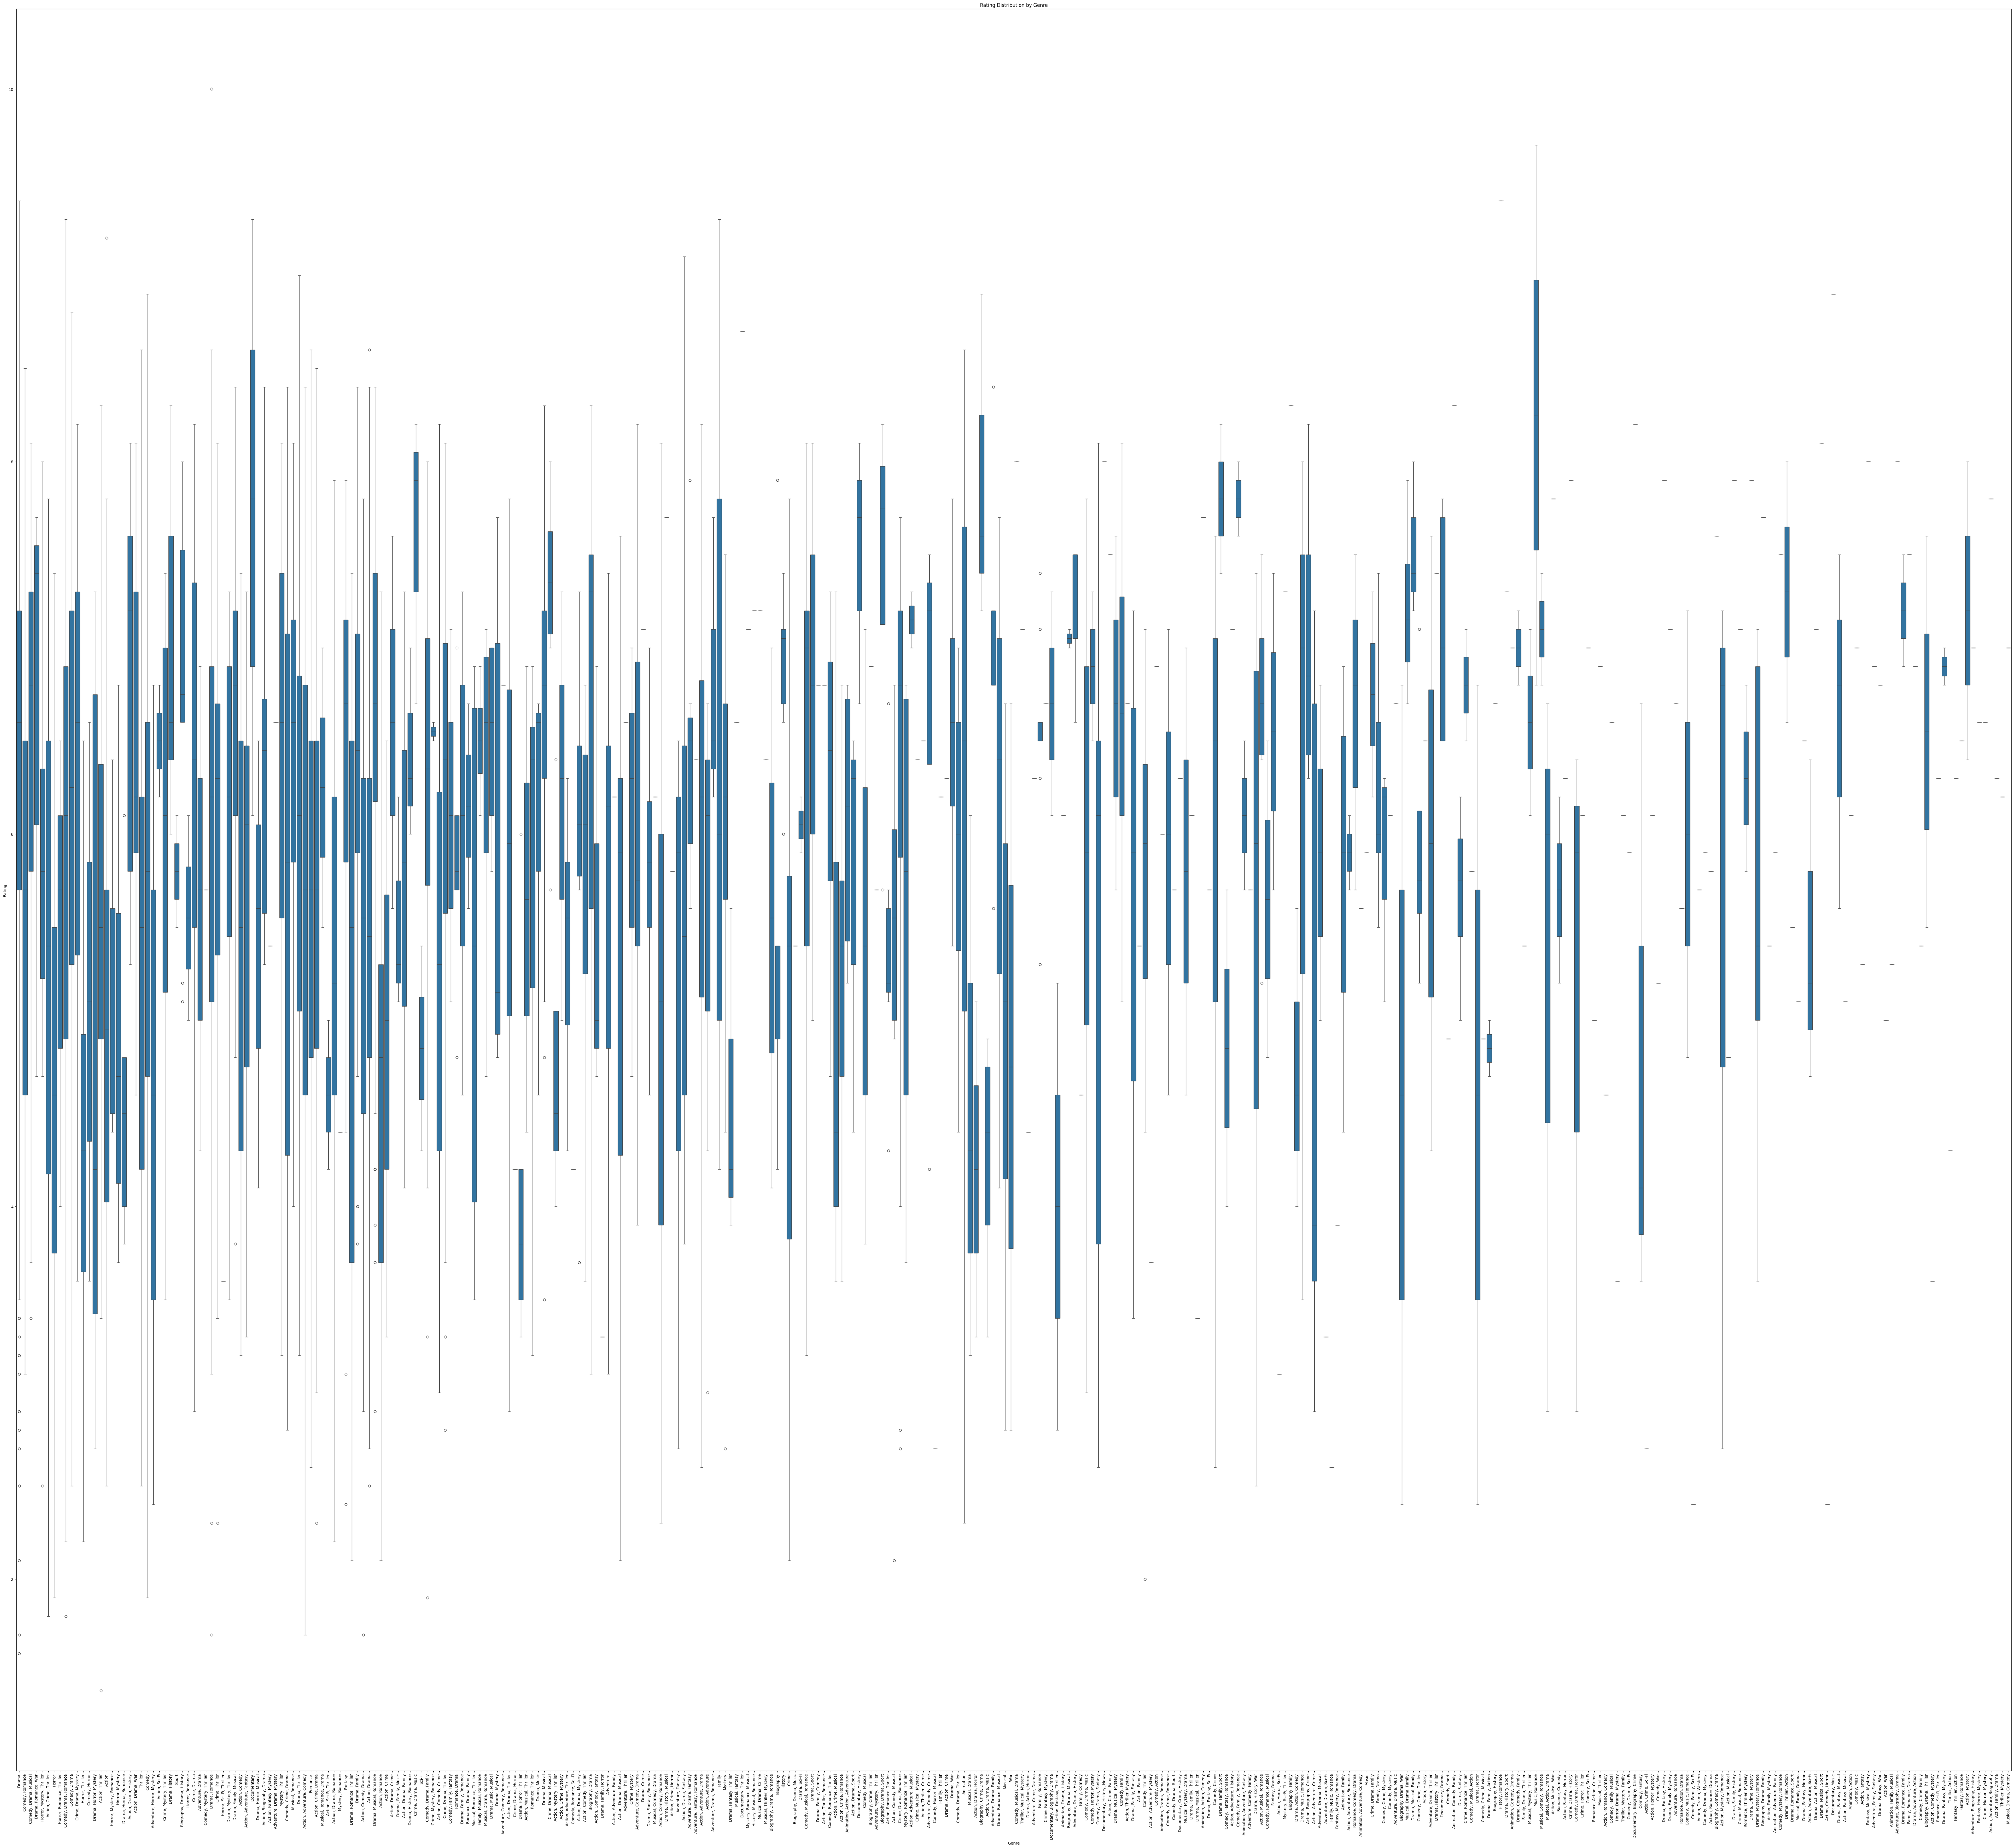

In [86]:
plt.figure(figsize=(90, 80))
sns.boxplot(data=data, x='Genre', y='Rating')
plt.xticks(rotation=90)
plt.title('Rating Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

# Correlation heatmap

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(imdb_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

In [93]:
data['PrimaryGenre'] = data['Genre'].str.split(',').str[0]
numerical_columns = ['Rating', 'Votes']
categorical_columns = ['Director', 'Genre']
num_imputer = SimpleImputer(strategy='mean')
data[numerical_columns] = num_imputer.fit_transform(data[numerical_columns])
cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = cat_imputer.fit_transform(data[categorical_columns])
print(data.isnull().sum())

Name            0
Year            0
Duration        0
Genre           0
Rating          0
Votes           0
Director        0
Actor 1         0
Actor 2         0
Actor 3         0
NameEncoded     0
PrimaryGenre    0
dtype: int64


# Feature Scaling

In [95]:
from sklearn.preprocessing import StandardScaler
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
data.dropna(subset=['Votes'], inplace=True)
numerical_columns = ['Rating', 'Votes']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
print(data[numerical_columns].head())


     Rating     Votes
1  0.806978 -0.185333
3 -1.082438 -0.183501
5 -0.864429 -0.129773
6  1.097657 -0.112203
8 -0.210400 -0.163760
